In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import datasets, models, layers

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
(x_train , y_train) , (x_test , y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


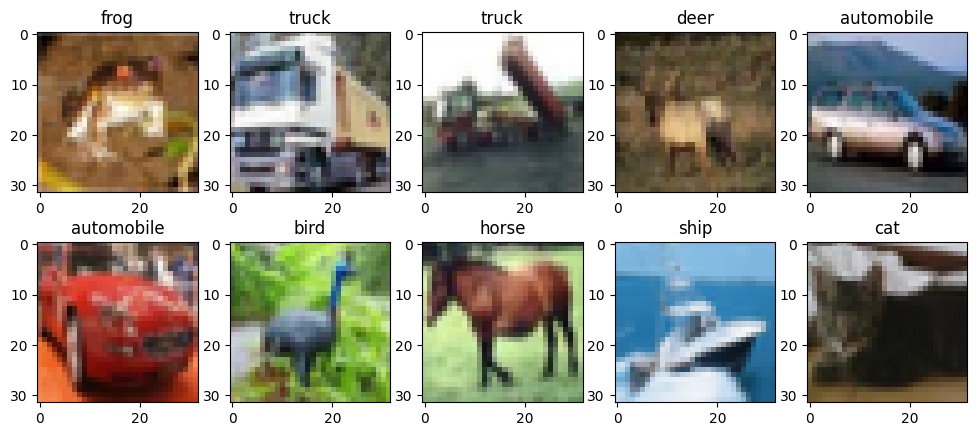

In [ ]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train.reshape(-1,)[i]])

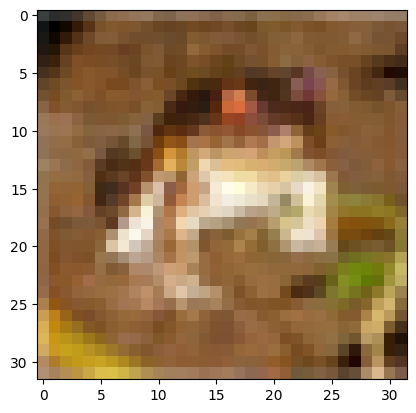

In [ ]:
plt.imshow(x_train[0])
plt.savefig('frog')

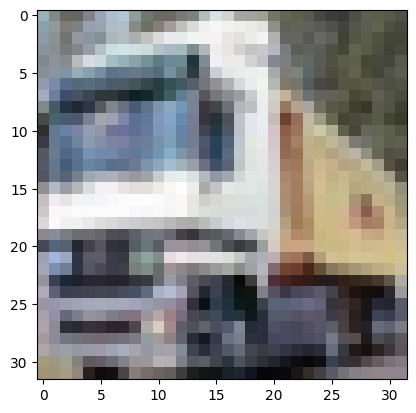

In [ ]:
plt.imshow(x_train[1])
plt.savefig('truck')

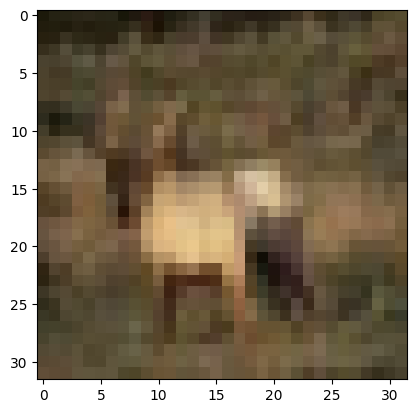

In [ ]:
plt.imshow(x_train[3])
plt.savefig('horse_deer')

In [ ]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [ ]:
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [ ]:
#model
model = models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128 ,(4,4),activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(4,4),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       131200    
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                   

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_split=0.2 , batch_size = 32, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 203s 162ms/step - loss: 1.6022 - accuracy: 0.4136 - val_loss: 1.4006 - val_accuracy: 0.5219
Epoch 2/5
1250/1250 [==============================] - 199s 159ms/step - loss: 1.2236 - accuracy: 0.5713 - val_loss: 1.1735 - val_accuracy: 0.6026
Epoch 3/5
1250/1250 [==============================] - 208s 166ms/step - loss: 1.0544 - accuracy: 0.6330 - val_loss: 1.0271 - val_accuracy: 0.6555
Epoch 4/5
1250/1250 [==============================] - 199s 159ms/step - loss: 0.9323 - accuracy: 0.6775 - val_loss: 0.9203 - val_accuracy: 0.6851
Epoch 5/5
1250/1250 [==============================] - 206s 165ms/step - loss: 0.8603 - accuracy: 0.7010 - val_loss: 0.8822 - val_accuracy: 0.6968


In [ ]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print("accuracy",test_loss)

313/313 [==============================] - 10s 32ms/step - loss: 0.8894 - accuracy: 0.6965
accuracy 0.8894482254981995


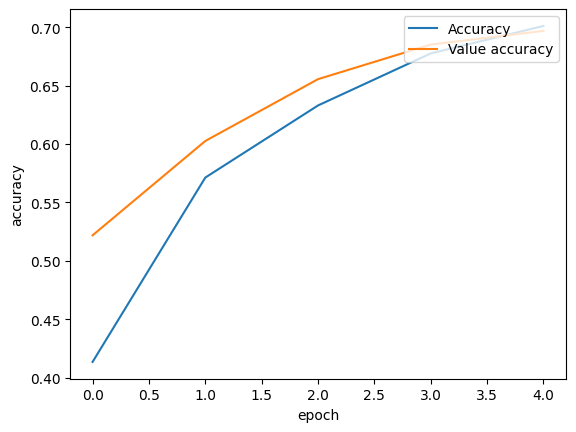

In [ ]:
plt.plot(history.history['accuracy'] , label="Accuracy")
plt.plot(history.history['val_accuracy'],label = "Value accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right')
plt.show()

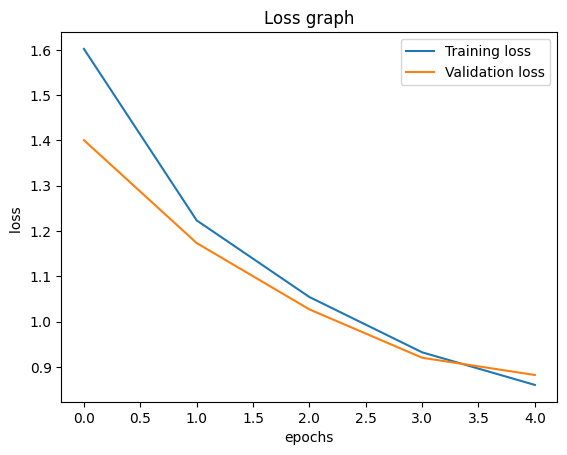

In [ ]:
plt.plot(history.history['loss'],label = "Training loss")
plt.plot(history.history['val_loss'] , label ="Validation loss")
plt.xlabel('epochs')
plt.ylabel('loss ')
plt.title('Loss graph')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
model.save('CIFAR10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = models.load_model('CIFAR10.h5')

In [ ]:
def ObjectDetection(threshold):
    path = str(input('Enter path of Image: '))
    img  = tf.io.read_file(path)
    img  = tf.image.decode_jpeg(img, channels=3)
    plt.imshow(img)
    img  = tf.image.resize(img, [32,32])
    img  = img / 255.0
    img  = tf.expand_dims(img, axis=0)
    # Model: Object Detection
    probabilities = model.predict(img)
    class_indices = [i for i, prob in enumerate(probabilities.reshape(-1,)) if prob>=threshold]
    label= [classes[i] for i in class_indices]
    print(f"\u2022 Detected Objects: {label}")

Enter path of Image: /content/frog.png
1/1 [==============================] - 0s 124ms/step
• Detected Objects: ['cat']


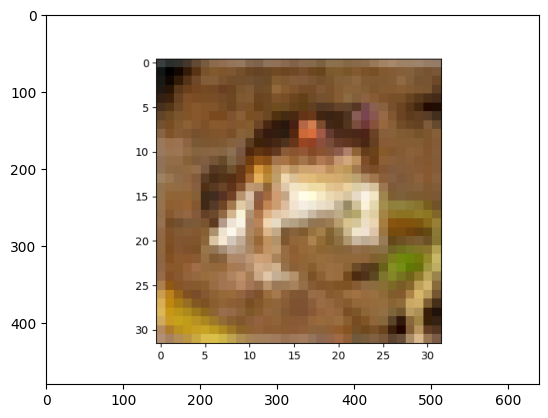

In [ ]:
ObjectDetection(0.5)

Enter path of Image: /content/truck.png
1/1 [==============================] - 0s 23ms/step
• Detected Objects: ['truck']


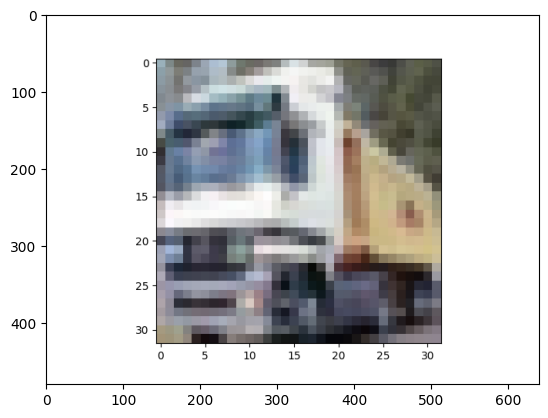

In [ ]:
ObjectDetection(0.1)

Enter path of Image: /content/horse_deer.png
1/1 [==============================] - 0s 20ms/step
• Detected Objects: ['cat', 'dog']


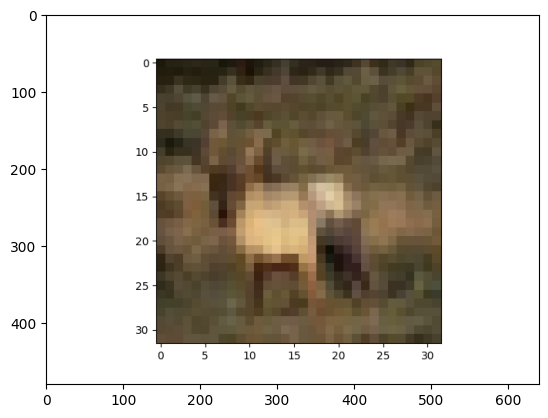

In [ ]:
ObjectDetection(0.09)

Enter path of Image: /content/horse_deer.png
1/1 [==============================] - 0s 20ms/step
• Detected Objects: ['cat']


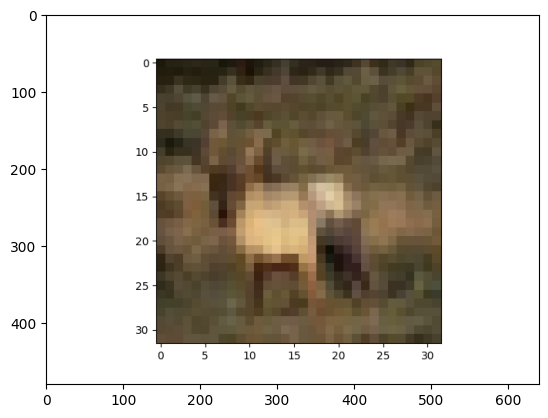

In [ ]:
ObjectDetection(0.2)